In [1]:
import socket
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from pickle import TRUE
from scipy.interpolate import interp1d
import math
from scipy import linalg
import pandas as pd
from scipy.spatial.distance import cdist
import time
from datetime import timedelta
from ctypes import*
import platform
from scipy.interpolate import pchip_interpolate
import function_library as flib
import time
from scipy.optimize import minimize
import geom_calc_library as gcalc
import perf_module_david as pmd


In [90]:
# XYZ = pmd.get_XYZ('L:/1_PROPUESTAS-OFERTAS-PROYECTOS/220060_GARAY SMART FACTORY/07_EXPERIMENTAL/01_Perfilometria_Laser/20240418_capturas/txt/20240418_z1_sop_1.txt')
XYZ = pmd.get_XYZ('L:/1_PROPUESTAS-OFERTAS-PROYECTOS/220060_GARAY SMART FACTORY/07_EXPERIMENTAL/01_Perfilometria_Laser/20240418_capturas/txt/20240418_z2_escint.txt')
# XYZ = pmd.get_XYZ('L:/1_PROPUESTAS-OFERTAS-PROYECTOS/220060_GARAY SMART FACTORY/07_EXPERIMENTAL/01_Perfilometria_Laser/20240118_Tubo_con_defectos_generados/00_RAW/Wenglor_log_2024_01_18-10_38_15.txt')


def get_prof_xy_data(prof_n, XYZ):
        points = XYZ[prof_n,:,[0,2]].T
        return points[np.argsort(points[:, 0])]

def filter_coordinates(array_coords, x_range, y_range):
    x_mask  = np.logical_and(array_coords[:, 0] >= x_range[0], array_coords[:, 0] <= x_range[1])
    y_mask  = np.logical_and(array_coords[:, 1] >= y_range[0], array_coords[:, 1] <= y_range[1])
    total_mask = np.logical_and(x_mask, y_mask)
    return array_coords[total_mask]


save_l = []
for prof in range(1000):
    points = get_prof_xy_data(prof, XYZ)
    points = points[~(points[:, 0] == 0) | ~(points[:, 1] == 0)]
    if points.size > 0:
        save_l.append(points)

print(len(save_l))

df_list = []
for i, array in enumerate(save_l):
    df = pd.DataFrame(array, columns=['X', 'Y'])
    df['Array_ID'] = i  
    df_list.append(df)

df_total = pd.concat(df_list, ignore_index=True)

df_total.to_csv('perfiles_4.csv', index=False)


Numero de perfiles: 1299
El shape de la array es de: (20000, 3000, 3)
1000


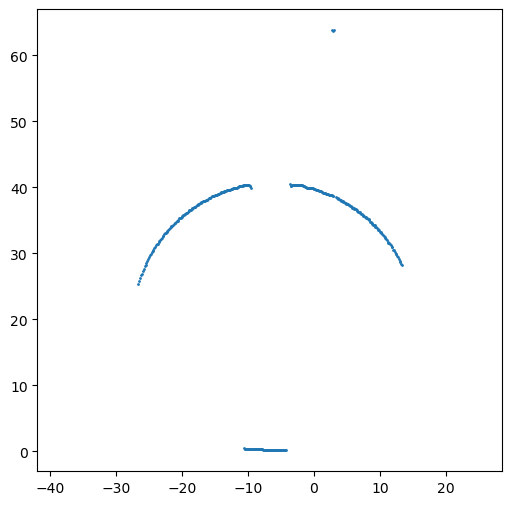

In [89]:
df_recuperado = pd.read_csv('perfiles_4.csv')
diccionario_recuperado = {i: group[['X', 'Y']].values for i, group in df_recuperado.groupby('Array_ID')}
points = diccionario_recuperado[25]

f,ax = plt.subplots(figsize=(6,6))
ax.scatter(points[:,0], points[:,1], s = 1)
ax.axis('equal')
plt.show()
